# Переговорная

1. На вход массив массивов вида [[start_1, end_1], ..., [start_n, end_n]]. Найти максимальную сумму end_i - start_i такую, что отрезки не пересекаются
Реализовать произвольный жадный алгоритм для задачи о переговорках (можно несколько). Покрыть тест-кейсами на успешную/не успешную работу алгоритма.

3 балла: успешное решение жадным алгоритмом

2 балла: решение покрытое тест-кейсами для успешной и не успешной работы

1 балл: решение просто с какими-то тестами

In [165]:
def make_schedule(time_slots: 'list[list[int]]'):
    indexes = [i for i in range(len(time_slots))]
    # сортируем по концу в порядке возрастания
    time_slots.sort(key=lambda x: x[-1])
    schedule = []
    while len(time_slots) > 0:
        _slots = []
        schedule.append(time_slots[0])
        for i in range(1, len(time_slots)):
            if time_slots[i][0] >= time_slots[0][-1]:
                _slots.append(time_slots[i])
        time_slots = _slots

    output = ' '*schedule[0][0]
    for idx, slot in enumerate(schedule):
        if idx >=1:
            output += ' '*(slot[0] - schedule[idx-1][-1])
        output += '#' + '-'*(slot[-1] - slot[0]) + '#'
    print(output)
    return schedule

In [144]:
def schedules_are_equal(schedule1, schedule2):
    try:
        assert len(schedule1) == len(schedule2)
    except Exception:
        print("Arrays' lenghts differ:")
        return False
        
    for i in range(len(schedule1)):
        if schedule1[i][0] != schedule2[i][0] or schedule1[i][1] != schedule2[i][1]:
            return False
    return True

In [196]:
def test1(func):
    time_slots = [[0, 4],
                  [3, 5],
                  [9, 12],
                  [4, 13],
                  [7, 8]]
    slots = func(time_slots)
    try:
        assert schedules_are_equal([[0, 4],[7, 8],[9, 12]], slots)
        print('test passed')
    except Exception:
        print('test not passed')

def test2(func):
    time_slots = [[0, 1], [0, 5], [1, 2], [3, 4], [4, 6]]
    slots = func(time_slots)
    try:
        assert schedules_are_equal([[0, 1],[1, 2],[3, 4], [4, 6]], slots)
        print('test passed')
    except Exception:
        print('test not passed')

def test3(func):
    time_slots = [[0, 12], [0, 6], [3, 13], [2, 11]]
    slots = func(time_slots)
    try:
        assert schedules_are_equal([[0, 6]], slots)
        print('test passed')
    except Exception:
        print('test not passed')

def test4(func):
    time_slots = [[1, 3], [4, 5], [1, 5]]
    slots = func(time_slots)
    try:
        assert schedules_are_equal([[1, 5]], slots)
        print('test passed')
    except Exception:
        print('test not passed')

In [197]:
time_slots = [[0, 4],
              [3, 5],
              [9, 12],
              [4, 13],
              [7, 8]]

In [198]:
time_slots = [[1, 3], [4, 5], [1, 5]]
make_schedule(time_slots)

 #--# #-#


[[1, 3], [4, 5]]

In [199]:
test1(make_schedule)
test2(make_schedule)
test3(make_schedule)
test4(make_schedule)

#----#   #-# #---#
test passed
#-##-# #-##--#
test passed
#------#
test passed
 #--# #-#
Arrays' lenghts differ:
test not passed


# Ханойские башни

Ханойские башни. Нужно рекурсивное решение - сложность 2^n − 1

In [89]:
def show_axes():
  print(A, B, C, '__________________________', sep='\n')

def move(n, source_axis, target_axis, aux_axis):
  if n > 0:
    # 1 переносим (n-1)-ый диск с первого стержня на буферный
    move(n - 1, source_axis, aux_axis, target_axis)
    # 2. переносим 1 диск с первого стержня на последний
    target_axis.append(source_axis.pop())
    show_axes()
    # 3. переносим (n-1) диск с буферного стрежня на последний
    move(n - 1, aux_axis, target_axis, source_axis)

ndisks = 5
A = list(range(ndisks, 0, -1))
B = []
C = []

show_axes()
move(ndisks, A, C, B)

[5, 4, 3, 2, 1]
[]
[]
__________________________
[5, 4, 3, 2]
[]
[1]
__________________________
[5, 4, 3]
[2]
[1]
__________________________
[5, 4, 3]
[2, 1]
[]
__________________________
[5, 4]
[2, 1]
[3]
__________________________
[5, 4, 1]
[2]
[3]
__________________________
[5, 4, 1]
[]
[3, 2]
__________________________
[5, 4]
[]
[3, 2, 1]
__________________________
[5]
[4]
[3, 2, 1]
__________________________
[5]
[4, 1]
[3, 2]
__________________________
[5, 2]
[4, 1]
[3]
__________________________
[5, 2, 1]
[4]
[3]
__________________________
[5, 2, 1]
[4, 3]
[]
__________________________
[5, 2]
[4, 3]
[1]
__________________________
[5]
[4, 3, 2]
[1]
__________________________
[5]
[4, 3, 2, 1]
[]
__________________________
[]
[4, 3, 2, 1]
[5]
__________________________
[1]
[4, 3, 2]
[5]
__________________________
[1]
[4, 3]
[5, 2]
__________________________
[]
[4, 3]
[5, 2, 1]
__________________________
[3]
[4]
[5, 2, 1]
__________________________
[3]
[4, 1]
[5, 2]
_________________

# Объем трехмерной сферы методом Монте Карло

Найти объем шара радиусом 1 с цетром (0, 0) методом Монте-Карло на сетке [-1,1]^3, засечь время и точность (1 балл).
Найти объем того же шара на некотором усеченном пространстве. Сравнить результаты (2 балла)

## Non Classic

In [73]:
import numpy as np

def drop_points(N: int) -> None:
    _x = np.random.uniform(-1, 1, (N, 3))
    # print(_x)
    _distances = (_x**2).sum(axis=1)
    # print(_distances)
    return np.where(_distances <= 1, 1, 0).sum() / N

In [45]:
monte_carlo = drop_points(100000000)

In [40]:
Vsp = 4 / 3 * np.pi
Vcube = 2**3
ration = Vsp/Vcube
print(ration)

0.5235987755982988


In [43]:
diff = (ration - monte_carlo)
diff

0.0016187755982988161

In [27]:
np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]]).shape

(3, 3)

In [85]:
def run_experiment(N):
    diffs = []
    points = []
    for i in range(10, N, 10):
        points.append(i)
        # print(i)
        monte_carlo = drop_points(i)
        diffs.append(ration - monte_carlo)

    return diffs, points

In [86]:
import time

In [87]:
%%time
diffs, points = run_experiment(10**5)

CPU times: user 9.41 s, sys: 758 ms, total: 10.2 s
Wall time: 10.2 s


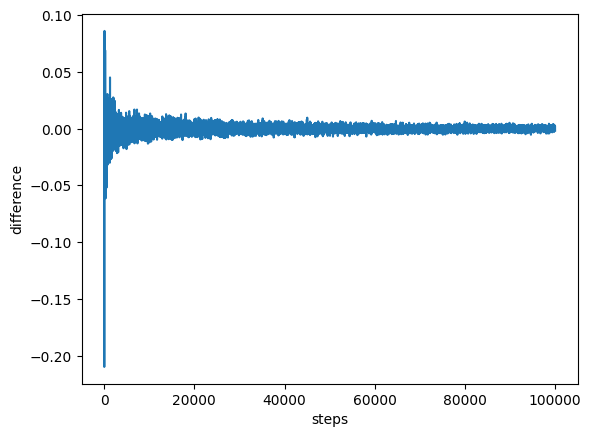

In [88]:
import matplotlib.pyplot as plt

plt.plot(points, diffs)
plt.xlabel('steps')
plt.ylabel('difference')
plt.show()

# Classic Monte-Carlo

In [74]:
def MonteCarlo(N: int, M: int):
    area = 0
    for _ in range(M):
        _x = np.random.uniform(-1, 1, (N, 3))
        area += np.where((_x**2).sum(axis=1) <= 1, 1, 0).sum() / N
    return area / M

In [91]:
def run_experiment(N, M):
    diffs = []
    points = []
    for i in range(10, N, 10):
        points.append(i)
        monte_carlo = MonteCarlo(i, M)
        diffs.append(ration - monte_carlo)

    return diffs, points

In [94]:
%%time
diffs, points = run_experiment(10**4, 100)

CPU times: user 9.7 s, sys: 176 ms, total: 9.87 s
Wall time: 9.87 s


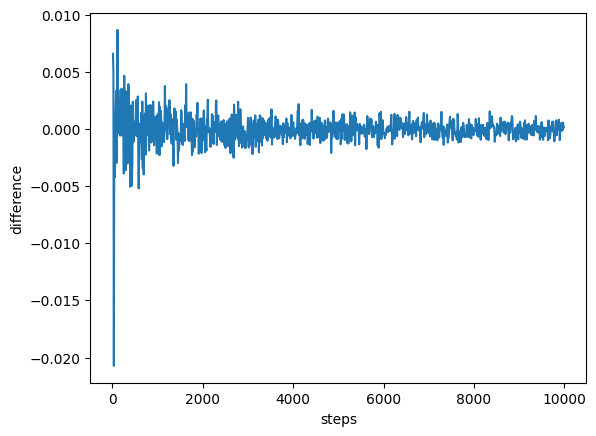

In [95]:
plt.plot(points, diffs)
plt.xlabel('steps')
plt.ylabel('difference')
plt.show()

## Усеченный случай

In [151]:
# построим плоскость
def plain(a, b, c, d, x, y, z):
    return a*x + b*y + c*z + d

def drop_points_in_plane(N: int, M: int, A:int, B:int, C: int, D:int, rule='greater') -> None:
    _x = np.random.uniform(-1, 1, (N, 3))
    _distances = (_x**2).sum(axis=1)
    _in_plain = np.array(list(map(lambda _point: plain(A, B, C, D, _point[0], _point[1], _point[2]), _x)))
    if rule=='greater':
        ration = np.where((_distances <= 1) & (_in_plain >= 0), 1, 0).sum() / np.where(_in_plain >= 0, 1, 0).sum()
    if rule == 'less':
        ration = np.where((_distances <= 1) & (_in_plain <= 0), 1, 0).sum() / np.where(_in_plain <= 0, 1, 0).sum()
    return ration

In [161]:
drop_points_in_plane(100, 10, -1, -1, 1, -2, 'less')

0.49

# Камни

Задача о комнях. Петя и Вася вытягивают камни из двух куч. В одной n, в другой m камней. Первый ходит Петя. Выигрывает тот, кто забирает последний камень. За ход можно взять либо один камень из любой из куч, либо по камню из каждой. Требуется по числам m, n определить может ли Петя детерминированно выиграть.

In [193]:
def stones(n, m, start=True):
    if n+m == 1 or n+m==2:
        print('You Won')
        return 1
    if n+m > 4:
        # взять 1 из первой кучи
        if start:
            res = stones(n-1, m, False)
            if res == 1:
                return 1
        else:
            res = stones(n-2, m, False)
            if res != 1:
                res = stones(n-1, m-1, False)
            if res != 1:
                res = stones(n-2, m-1, False)
            if res == 1:
                return 1
            else:
            
                # взять 1 из второй кучи
                if start:
                    res = stones(n, m-1, False)
                    if res == 1:
                        return 1
                else:
                    res = stones(n, m-2, False)
                    if res != 1:
                        res = stones(n-1, m-1, False)
                    if res != 1:
                        res = stones(n-1, m-2, False)
                    if res == 1:
                        return 1
                    else:
                        # взять по 1 из каждой
                        if start:
                            res = stones(n-1, m-1, False)
                            if res == 1:
                                return 1
                        else:
                            res = stones(n-1, m-2, False)
                            if res != 1:
                                res = stones(n-2, m-1, False)
                            if res != 1:
                                res = stones(n-2, m-2, False)
                            if res == 1:
                                return 1
                            else:
                                return 0
    else:
        print('You loose')

In [203]:
stones(3, 3)

You Won


1